# AccelerateAI : Data Science Bootcamp

## Normalization, Standardization

## Import Libraries

In [1]:
import numpy as np
from numpy.random import seed, randint
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Use Case 1 (Using a sample Age-Weight dataset)

## 1a. Normalization

In [2]:
# Create and initialize a nested list
students = [[5,5],[10,8],[15,13],[20,17],[25,27],
           [30,33],[35,36],[40,40],[45,50],[50,70],
           [55,77],[60,80],[65,100],[70,102],[75,108],
           [80,109],[85,114],[90,120],[95,124],[97,130]]

# Create a dataframe object
df = pd.DataFrame(students,columns=['Age','Weight'])

df.sample(4)

,Age,Weight
2,15,13
0,5,5
12,65,100
13,70,102


In [3]:
# Storing the columns Age values into X and Weight as Y
X = df['Age']
y = df['Weight']
X = X.to_numpy()
y = y.to_numpy()

In [4]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit([X])
normalizer.transform([X])

array([[0.01874369, 0.03748738, 0.05623107, 0.07497476, 0.09371845,
        0.11246214, 0.13120583, 0.14994952, 0.16869321, 0.1874369 ,
        0.20618059, 0.22492428, 0.24366797, 0.26241166, 0.28115535,
        0.29989904, 0.31864273, 0.33738641, 0.3561301 , 0.36362758]])

In [5]:
normalizer = Normalizer().fit([y])
normalizer.transform([y])

array([[0.01394219, 0.0223075 , 0.03624969, 0.04740344, 0.07528782,
        0.09201844, 0.10038376, 0.11153751, 0.13942188, 0.19519064,
        0.2147097 , 0.22307501, 0.27884377, 0.28442064, 0.30115127,
        0.30393971, 0.3178819 , 0.33461252, 0.34576627, 0.3624969 ]])

## 1b. Standardization

### StandardScaler from sklearn

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform([X])
sc.transform([X])
sc.fit_transform([y])
sc.transform([y])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

### Z-Score Normalization

In [7]:
# Calculating the mean and standard deviation
df = (df - df.mean())/df.std()
print(df)

         Age    Weight
0  -1.614199 -1.456394
1  -1.443745 -1.387207
2  -1.273291 -1.271895
3  -1.102837 -1.179645
4  -0.932383 -0.949020
5  -0.761929 -0.810645
6  -0.591475 -0.741458
7  -0.421021 -0.649208
8  -0.250567 -0.418584
9  -0.080113  0.042666
10  0.090341  0.204103
11  0.260795  0.273290
12  0.431249  0.734539
13  0.601703  0.780664
14  0.772157  0.919039
15  0.942611  0.942101
16  1.113065  1.057414
17  1.283519  1.195788
18  1.453973  1.288038
19  1.522154  1.426413


### Min-Max Scaling

In [8]:
# Calculating the minimum and the maximum 
df = (df-df.min())/(df.max()-df.min())
print(df)

         Age  Weight
0   0.000000   0.000
1   0.054348   0.024
2   0.108696   0.064
3   0.163043   0.096
4   0.217391   0.176
5   0.271739   0.224
6   0.326087   0.248
7   0.380435   0.280
8   0.434783   0.360
9   0.489130   0.520
10  0.543478   0.576
11  0.597826   0.600
12  0.652174   0.760
13  0.706522   0.776
14  0.760870   0.824
15  0.815217   0.832
16  0.869565   0.872
17  0.923913   0.920
18  0.978261   0.952
19  1.000000   1.000


Usually, the Z-score normalization is preferred because min-max scaling is prone to overfitting.

### Min-Max Scaler from sklearn

In [9]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler()


In [10]:
print(scaler.data_max_)

[ 1. 18.]


In [11]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [12]:
print(scaler.transform([[2, 2]]))

[[1.5 0. ]]


## Use Case 2 (Using Retail Sales dataset)

## 2a. Normalization from sklearn (Normalizer)

In [13]:
df = pd.read_csv("./Retail_Sales.csv")
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
385,525-88-7307,B,Perth,Member,Male,Sports and travel,75.82,1,3.791,79.611,1/31/2019,13:19,Cash,75.82,4.761905,3.791,5.8
454,187-83-5490,A,Adelaide,Member,Male,Electronic accessories,20.77,4,4.154,87.234,1/31/2019,13:47,Cash,83.08,4.761905,4.154,4.7
792,744-16-7898,B,Perth,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.70,4.761905,48.685,4.9
21,371-85-5789,B,Perth,Normal,Male,Health and beauty,87.98,3,13.197,277.137,03-05-2019,10:40,Ewallet,263.94,4.761905,13.197,5.1
566,718-57-9773,C,Hobart,Normal,Female,Sports and travel,49.33,10,24.665,517.965,02-03-2019,16:40,Credit card,493.30,4.761905,24.665,9.4


In [14]:
df = df[['Quantity', 'cogs']]

### Plot with Original Data

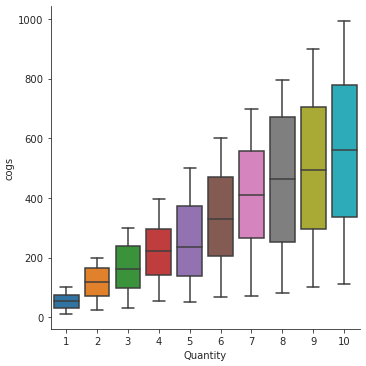

In [15]:
with sns.axes_style(style='ticks'):
    my_plot = sns.factorplot("Quantity", "cogs", data=df, kind="box")
    my_plot.set_axis_labels("Quantity", "cogs") 
    
plt.show()

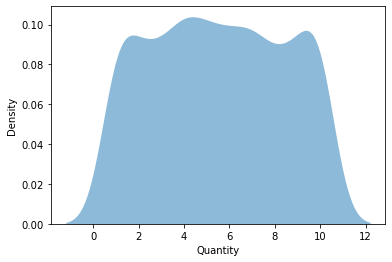

In [16]:
sns.kdeplot(
   data=df, x="Quantity",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

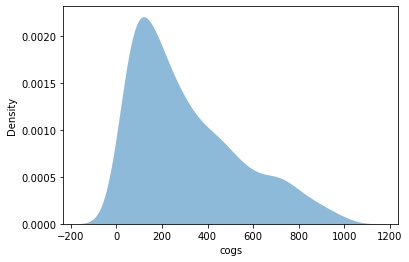

In [17]:
sns.kdeplot(
   data=df, x="cogs",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

In [18]:
# Storing the columns Age values into X and Weight as Y
X = df['Quantity']
y = df['cogs']
X = X.to_numpy()
y = y.to_numpy()

In [19]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit([X])
normalizer.transform([X])

array([[0.03549232, 0.02535166, 0.03549232, 0.04056265, 0.03549232,
        0.03549232, 0.03042199, 0.05070332, 0.01014066, 0.01521099,
        0.02028133, 0.02028133, 0.02535166, 0.05070332, 0.05070332,
        0.03042199, 0.03549232, 0.03042199, 0.01521099, 0.01014066,
        0.02535166, 0.01521099, 0.01014066, 0.02535166, 0.01521099,
        0.04056265, 0.00507033, 0.01014066, 0.02535166, 0.04563298,
        0.02535166, 0.04563298, 0.04056265, 0.01014066, 0.02028133,
        0.00507033, 0.02535166, 0.04563298, 0.04056265, 0.04056265,
        0.00507033, 0.01014066, 0.03042199, 0.04056265, 0.01014066,
        0.02028133, 0.04563298, 0.04563298, 0.03042199, 0.05070332,
        0.03549232, 0.02535166, 0.02028133, 0.00507033, 0.01014066,
        0.04056265, 0.01014066, 0.04056265, 0.05070332, 0.03042199,
        0.01521099, 0.03042199, 0.04563298, 0.05070332, 0.02028133,
        0.05070332, 0.01014066, 0.03042199, 0.05070332, 0.00507033,
        0.05070332, 0.05070332, 0.01521099, 0.03

In [20]:
normalizer = Normalizer().fit([y])
normalizer.transform([y])

array([[0.04277541, 0.00625068, 0.02653347, 0.03810622, 0.04943026,
        0.04890337, 0.03379293, 0.06018322, 0.00593323, 0.01346023,
        0.00473873, 0.00834842, 0.01920611, 0.03533596, 0.05839965,
        0.04600629, 0.03947663, 0.03564359, 0.0134185 , 0.0065943 ,
        0.03519688, 0.02159429, 0.00543253, 0.01413766, 0.02175383,
        0.03442127, 0.00274244, 0.01434547, 0.03614593, 0.01832741,
        0.0385063 , 0.05748578, 0.05483578, 0.01580341, 0.03253625,
        0.00557325, 0.02561632, 0.04482816, 0.0359463 , 0.01971418,
        0.00709501, 0.0091813 , 0.03393038, 0.06460124, 0.002515  ,
        0.03074941, 0.04174291, 0.01473409, 0.00929256, 0.06760386,
        0.05234533, 0.01824069, 0.00584815, 0.00126241, 0.00264427,
        0.05627573, 0.00725537, 0.0586451 , 0.05919326, 0.01502617,
        0.00607232, 0.02735735, 0.04055004, 0.01293497, 0.02478672,
        0.01298406, 0.00547671, 0.04791586, 0.06444579, 0.00149967,
        0.07320819, 0.05082357, 0.01190901, 0.03

## 2b. Standardization

### StandardScaler from sklearn

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform([X])
sc.transform([X])
sc.fit_transform([y])
sc.transform([y])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### Min-Max Scaling

In [22]:
# Calculating the minimum and the maximum 
df = (df-df.min())/(df.max()-df.min())
print(df)

     Quantity      cogs
0    0.666667  0.521616
1    0.444444  0.067387
2    0.666667  0.319628
3    0.777778  0.463549
4    0.666667  0.604377
..        ...       ...
995  0.000000  0.030707
996  1.000000  0.980465
997  0.000000  0.022049
998  0.000000  0.056622
999  0.666667  0.618835

[1000 rows x 2 columns]


## Summary

In [23]:
df.sample(3)

,Quantity,cogs
144,0.555556,0.465523
810,0.777778,0.077155
374,0.444444,0.330963


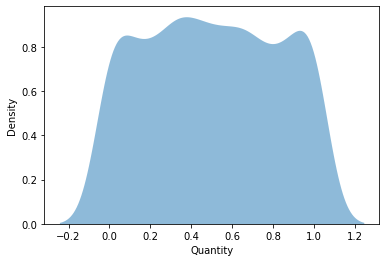

In [24]:
sns.kdeplot(
   data=df, x="Quantity",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

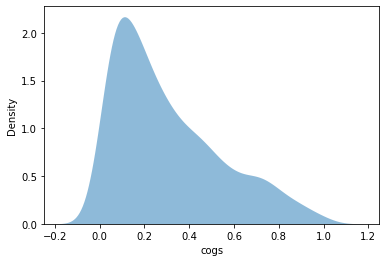

In [25]:
sns.kdeplot(
   data=df, x="cogs",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()